In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [21]:
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

### **(1) Advertising -> Sales**

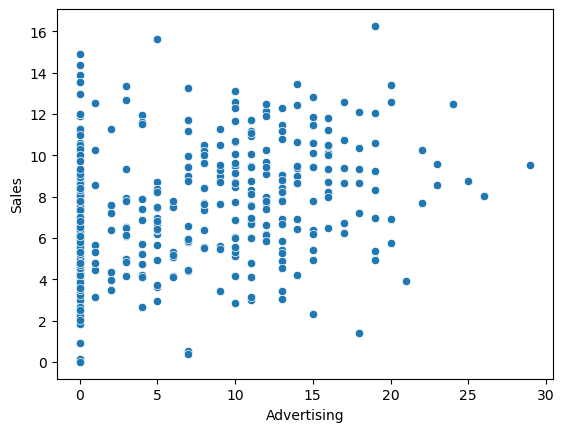

In [4]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

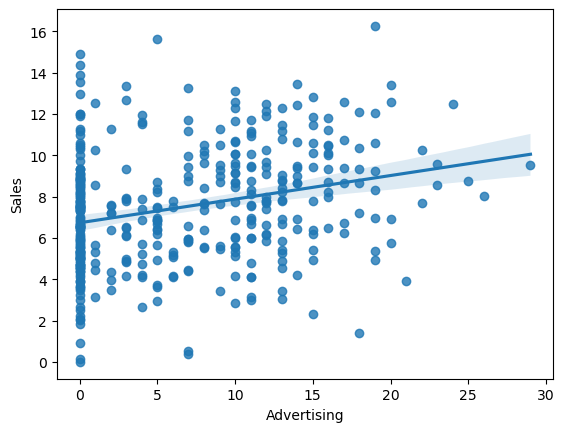

In [5]:
sns.regplot(x=var, y = target, data = data)
plt.show()

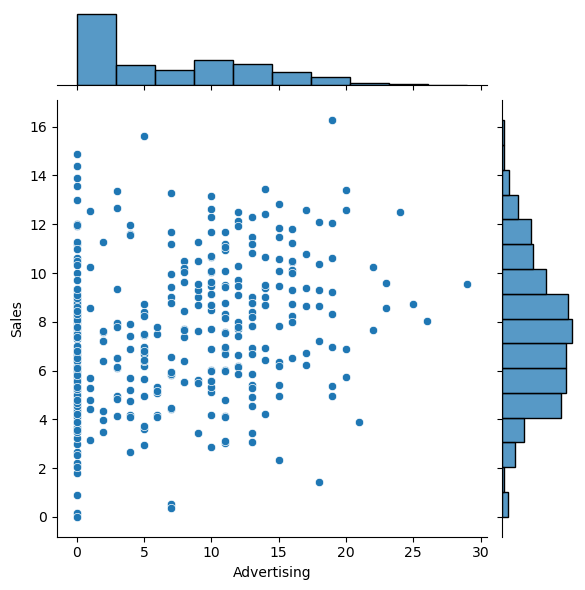

In [6]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

- 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


- 시각화와 수치화 결과로부터 파악한 내용

- 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

- 추가 : 광고비 0 빼고 분석해보기

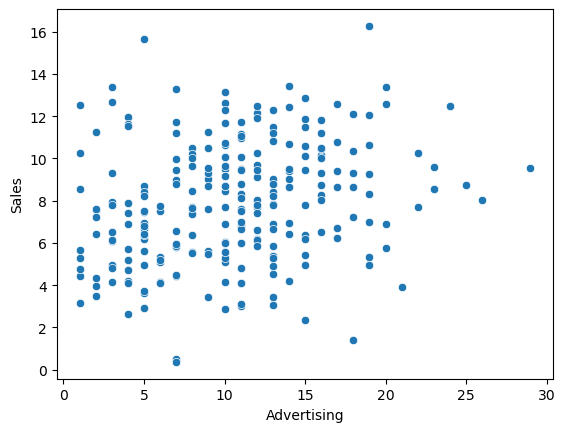

In [8]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [9]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


In [54]:
def eda_2_nn(var, target, data):
    result = spst.pearsonr(data[var], data[target]) 
    print(f'상관계수 : {result[0]}, p-value : {result[1]}') 
    
    fig ,axes = plt.subplots(1,2, figsize = (20,10))
    sns.scatterplot(x=var, y = target, data = data, ax = axes[0])
    sns.regplot(x = var, y = target, data = data, ax = axes[1])
    title_font = {'fontsize': 20, 'fontweight': 'bold'}
    axes[0].set_title(var + '-' + target + '상관도분석', fontdict = title_font)
    axes[1].set_title(var + '-' + target + '상관도분석', fontdict = title_font)
    axes[0].grid()
    axes[1].grid()
    plt.show()

상관계수 : -0.4449507278465726, p-value : 7.618187011913169e-21


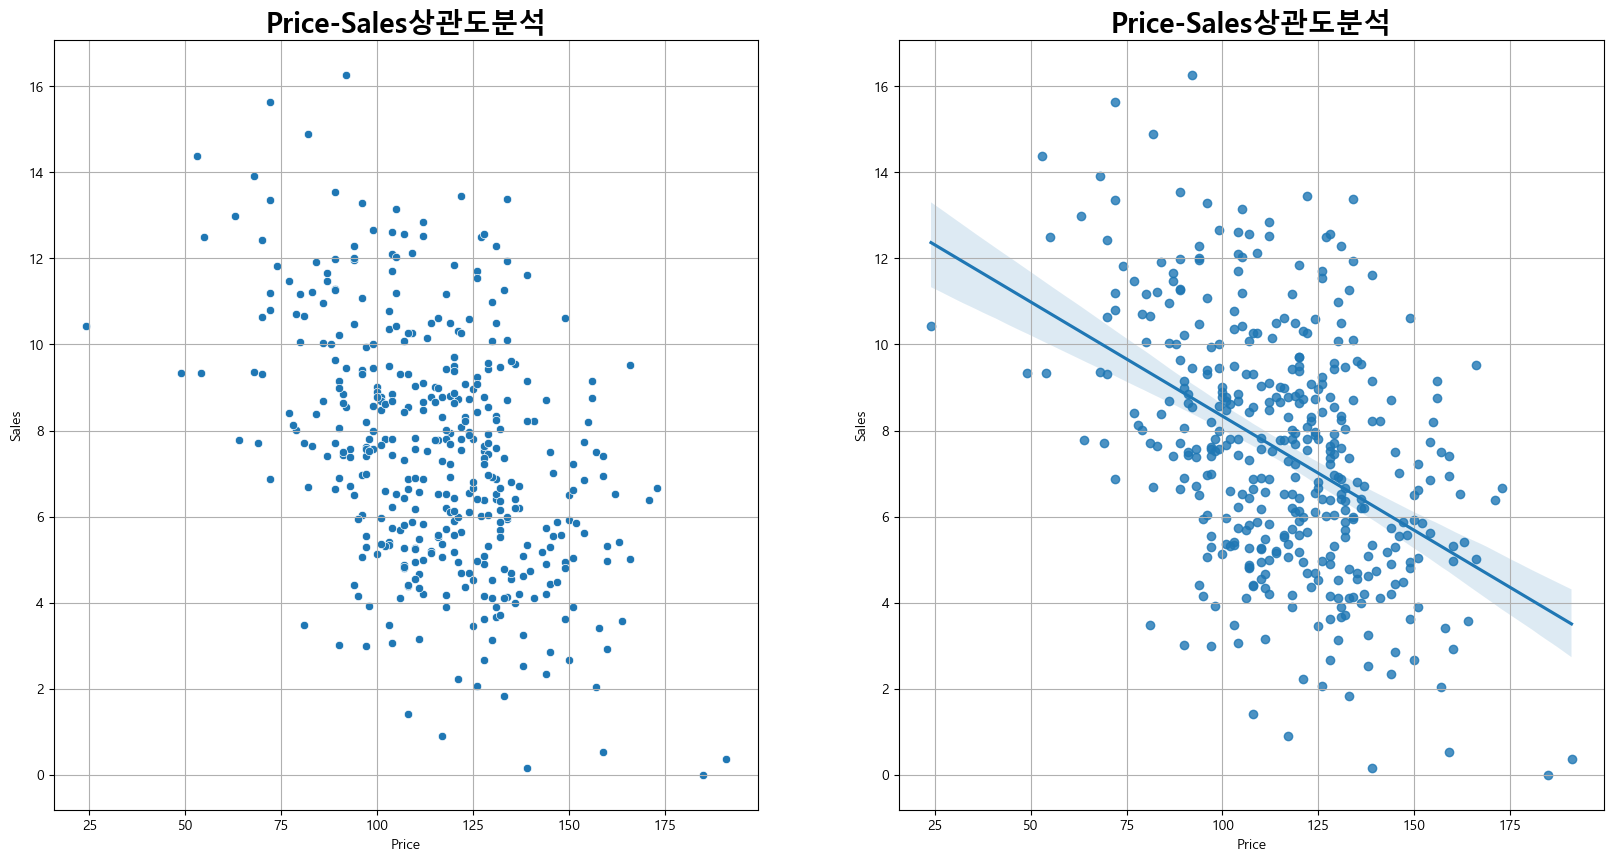

In [49]:
eda_2_nn('Price', 'Sales', data)

상관계수 : 0.06407872955062152, p-value : 0.2009398289418404


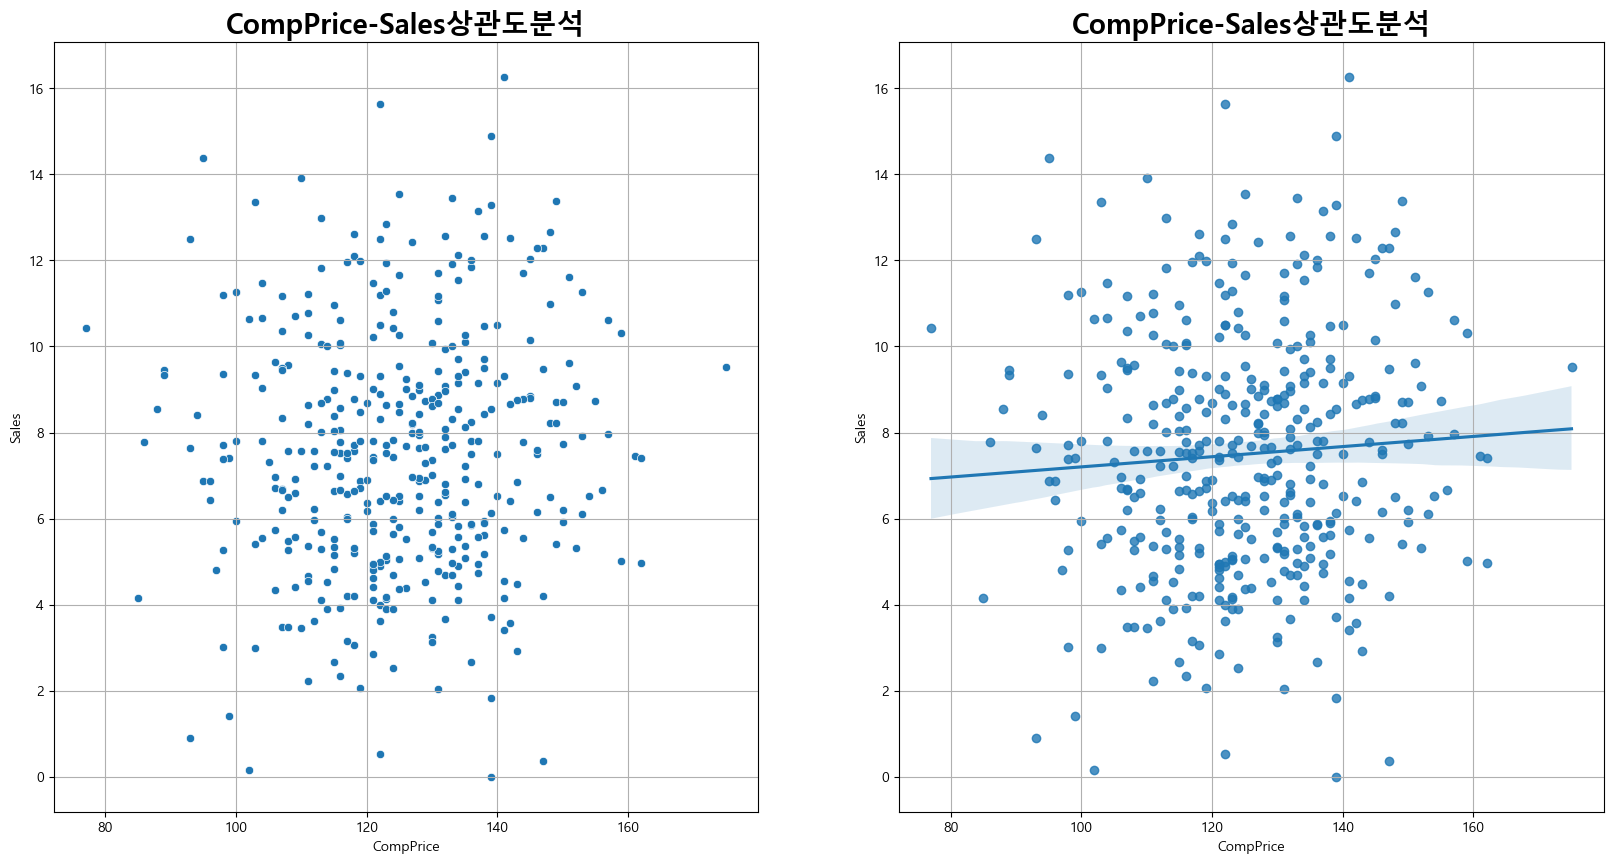

In [50]:
eda_2_nn('CompPrice', 'Sales', data)

In [55]:
data['Price_Diff'] = data['CompPrice'] - data['Price'] 
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,Price_Diff
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


상관계수 : 0.5979217124533921, p-value : 3.877120641788767e-40


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


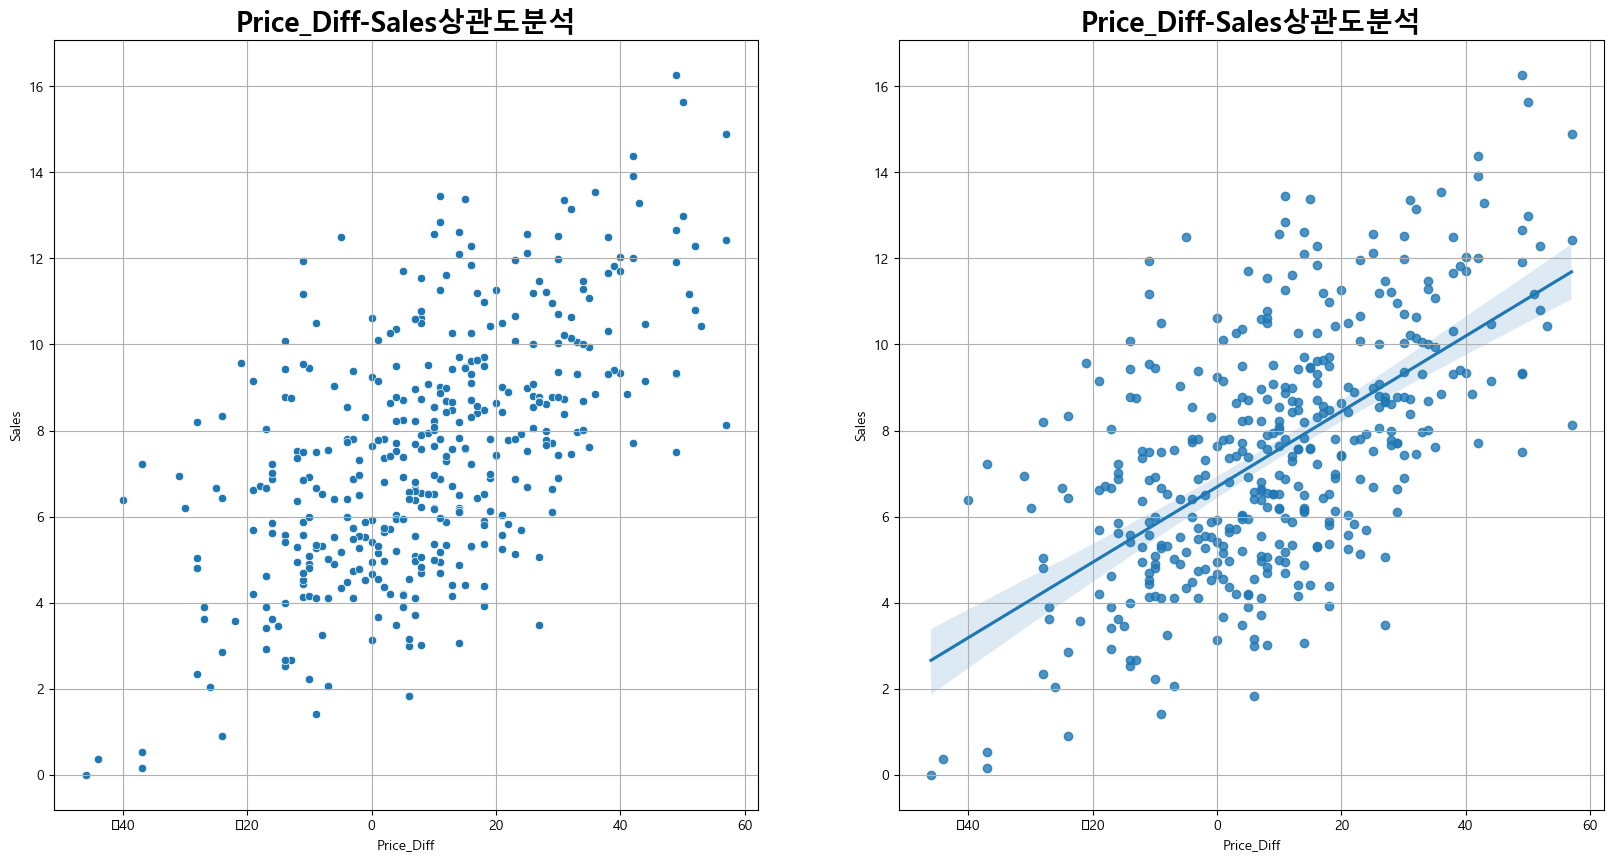

In [57]:
eda_2_nn('Price_Diff', 'Sales', data)

- CompPrice에서 Price를 뺏더니 CompPrice보다 훨씬 상관관계가 높은 그래프가 나왔다. 

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517904


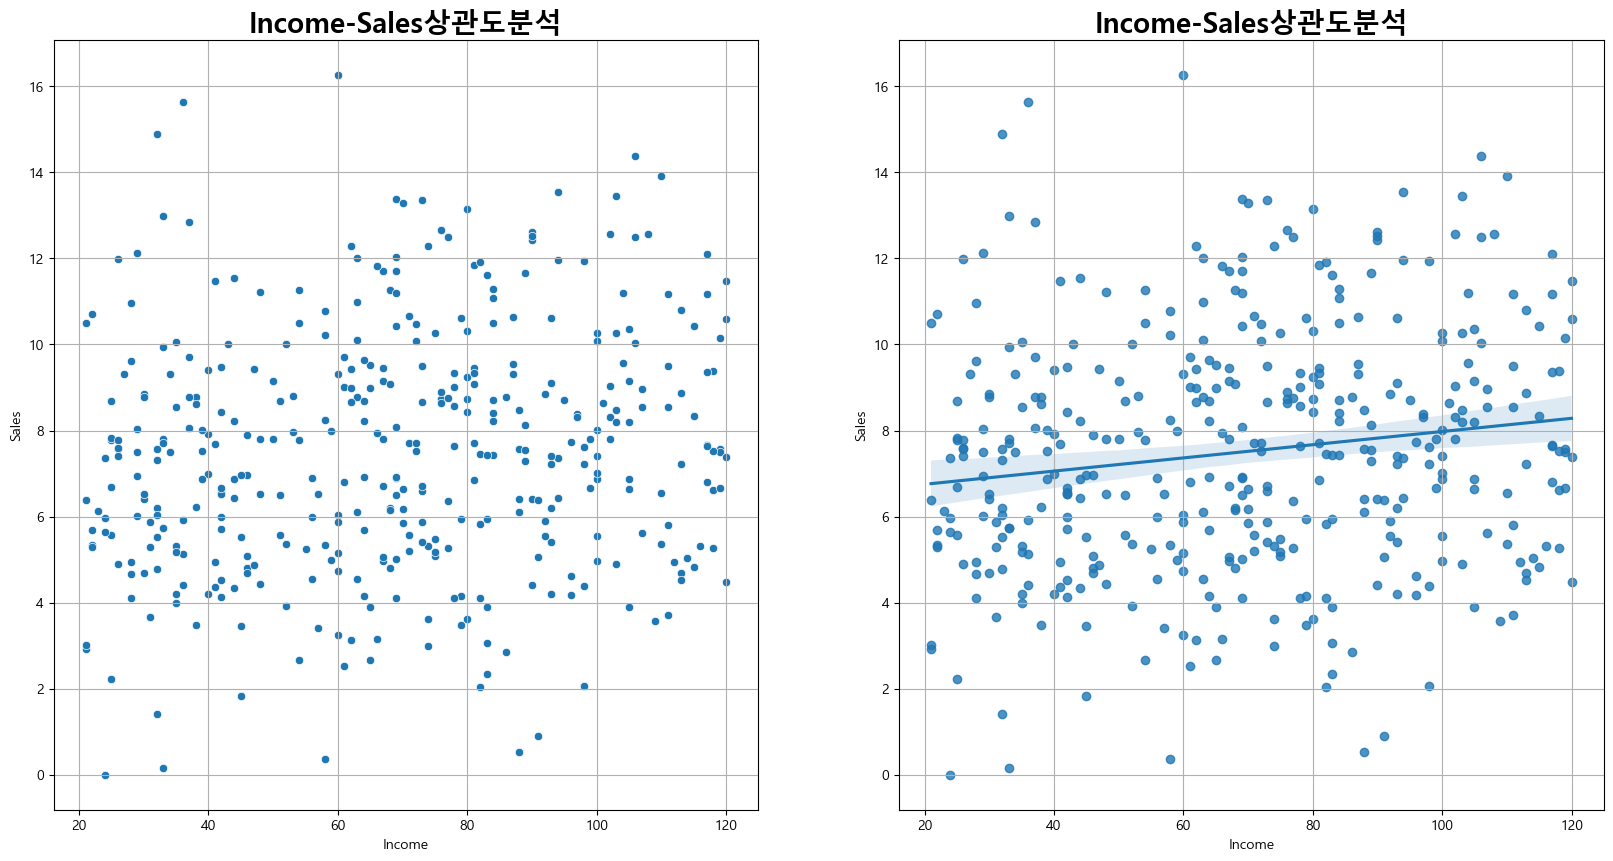

In [58]:
eda_2_nn('Income', 'Sales', data)

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**
1) 시각화 : 평균비교 barplot


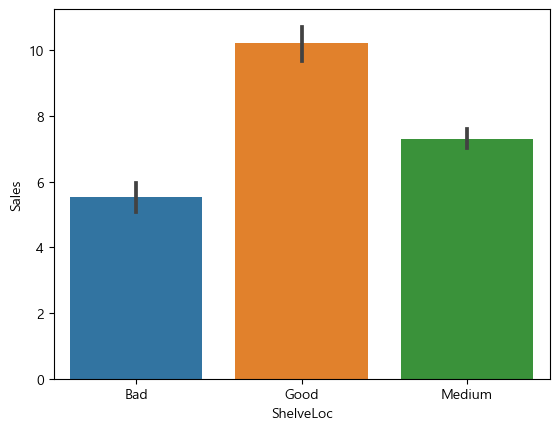

In [59]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [63]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]
display(d_b)
spst.f_oneway(d_b, d_m, d_g)

0       9.50
4       4.15
5      10.81
10      9.01
24     10.14
       ...  
388     8.14
391     6.10
392     4.53
394     5.35
398     5.94
Name: Sales, Length: 96, dtype: float64

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

### **(2) Urban -> Sales**

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

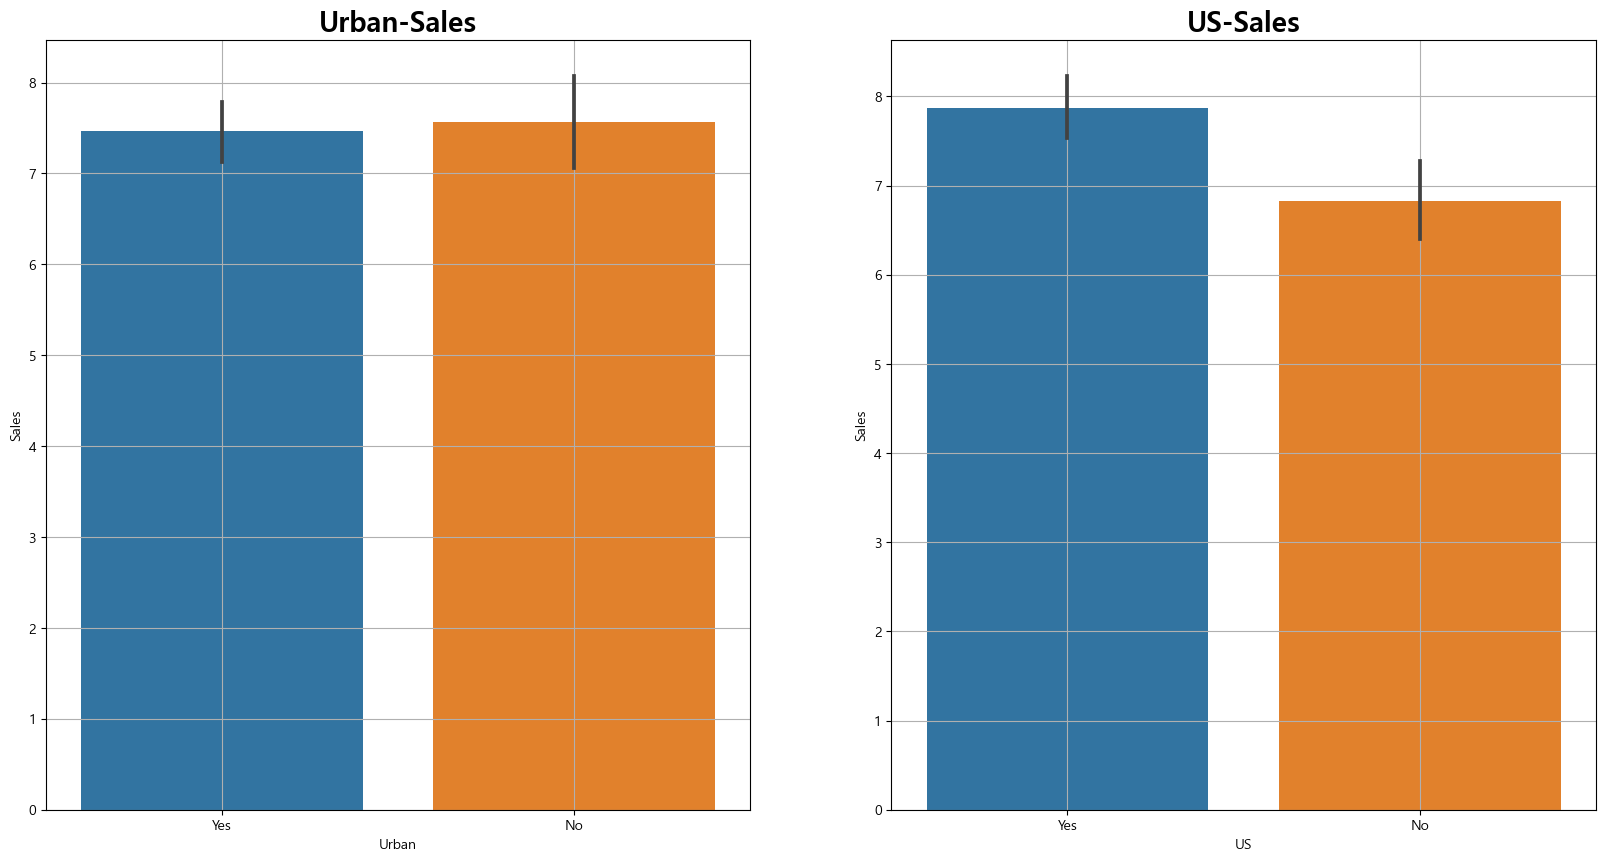

In [76]:
fig, axes = plt.subplots(1,2, figsize = (20,10))

sns.barplot(data = data, x = 'Urban', y = 'Sales', ax = axes[0])
sns.barplot(data = data, x = 'US', y = 'Sales', ax = axes[1])
title_font = {'fontsize': 20, 'fontweight': 'bold'}
axes[0].set_title('Urban-Sales', title_font)
axes[0].grid()
axes[1].set_title('US-Sales', title_font)
axes[1].grid()

In [74]:
yes = data.loc[data['Urban'] == 'Yes', 'Sales']
no = data.loc[data['Urban'] == 'No', 'Sales']

spst.ttest_ind(yes, no)

TtestResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775, df=398.0)

In [75]:
yes = data.loc[data['US'] == 'Yes', 'Sales']
no = data.loc[data['US'] == 'No', 'Sales']

spst.ttest_ind(yes, no)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)